Main Python code to perform the simulation and display results

In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

import barneshut

import model

Initial parameters:

In [2]:
massfactor = 10**24 # [kg]
scalefactor = 1000  # [au]
velocityfactor = 100  # []
accuracy = 0.001

Generate random body system:

In [3]:
count = 100

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [5]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [6]:
masses

array([[6.28625065e+23, 1.86455883e+24, 1.36368170e+24, 4.14502488e+22,
        1.10916112e+24, 5.01229755e+23, 5.63973620e+23, 5.49028138e+23,
        1.49518034e+24, 4.34530546e+23, 1.55446954e+24, 2.33557061e+24,
        8.46843175e+23, 7.02957525e+23, 1.29556759e+24, 1.22272259e+24,
        4.78750220e+23, 1.51272084e+24, 7.32300949e+21, 1.89632712e+23,
        7.36290479e+23, 1.79963185e+24, 1.79138964e+23, 7.11282706e+23,
        8.80016822e+22, 1.96888144e+24, 1.70460840e+24, 5.37167011e+23,
        1.27134669e+24, 1.26908111e+24, 8.07895053e+23, 1.17088064e+24,
        1.05121043e+24, 4.76601487e+23, 7.06506508e+23, 4.81554843e+23,
        1.75273376e+23, 9.44748227e+23, 1.21076151e+24, 1.29071709e+24,
        1.54402852e+23, 1.99676841e+23, 1.65825504e+23, 1.98146873e+23,
        5.14849670e+23, 6.05420165e+23, 4.34210886e+23, 7.37539836e+23,
        4.03242593e+23, 2.75534362e+24, 4.91192467e+23, 1.29104178e+24,
        1.65831141e+23, 7.60692016e+23, 8.08705898e+23, 8.853192

In [7]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

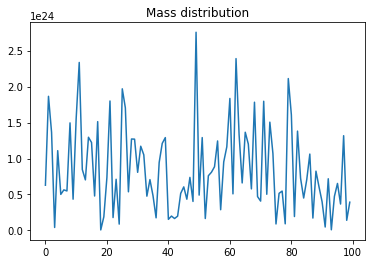

In [8]:
plt.title('Mass distribution')
plt.plot(masses.flatten())

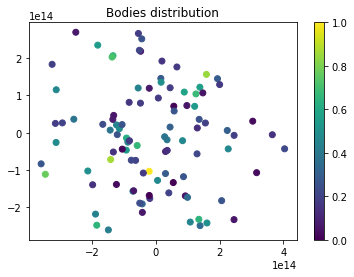

In [9]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-1, 1))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

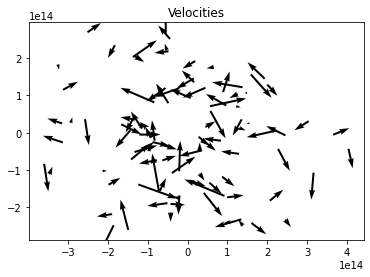

In [10]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Compute forces using C++ function:

In [11]:
state = np.concatenate((masses.T, positions), axis=1)
state.shape

(100, 3)

In [12]:
radius = max(abs(positions.flatten())) * 1.1  # Emergency reserve
radius

444479298673531.9

In [13]:
result = np.array(barneshut.getForces(state, count, radius, accuracy)) * G

Computation starting.. 
Conversion.. 
Tree construction..
Force computation.. 
Conversion.. 
Done!
Cleaning up memory.. Memory stack: 0


In [14]:
result.shape

(100, 2)

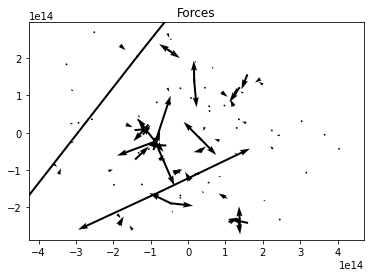

In [15]:
fig, ax = plt.subplots()
ax.quiver(positions[:,0], positions[:,1], result[:,0], result[:,1])
ax.set_title('Forces')
ax.axis('equal')

plt.show()